In [37]:
import pyvista as pv
import numpy as np
import pylab as py
from soln.data_loader import load

/home/sean/.local/share/virtualenvs/machina-labs-hnh8cWl7/lib/python3.8/site-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(
ERROR:root:Attempt to use a texture buffer exceeding your hardware's limits. This can happen when trying to color by cell data with a large dataset. Hardware limit is 65536 values while 222734 was requested.
2023-01-01 07:44:05.265 (72433.741s) [        D6735740]   vtkTextureObject.cxx:1025   ERR| vtkTextureObject (0x4a86700): Attempt to use a texture buffer exceeding your hardware's limits. This can happen when trying to color by cell data with a large dataset. Hardware limit is 65536 values while 222734 was requested.


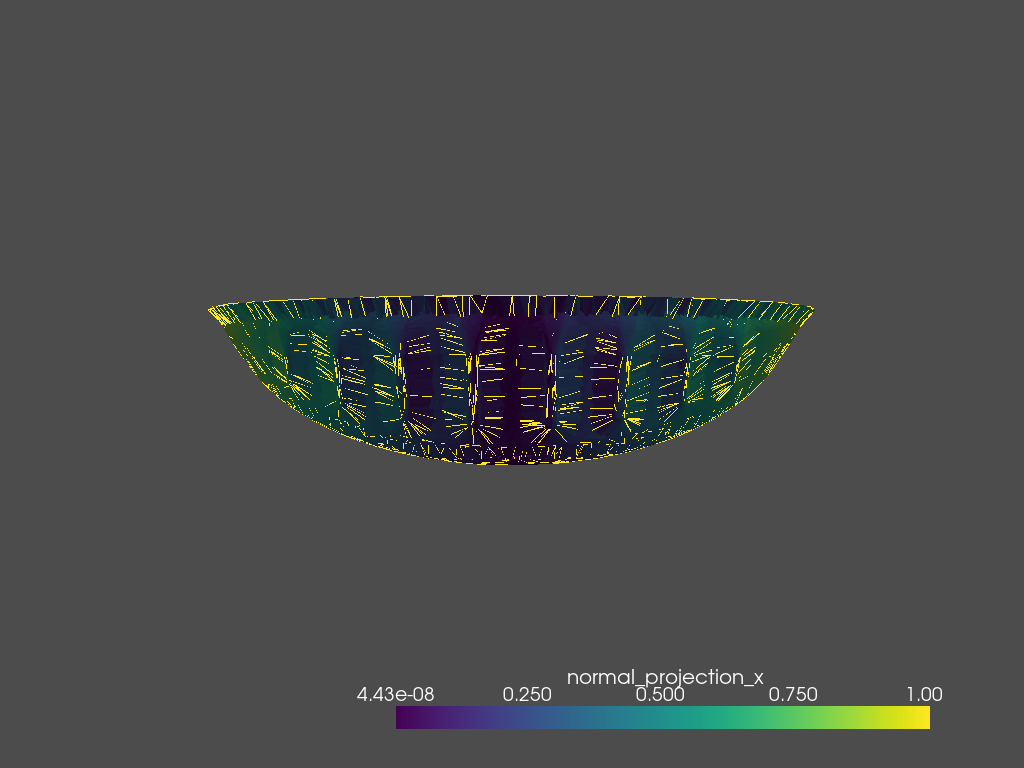

ERROR:root:Attempt to use a texture buffer exceeding your hardware's limits. This can happen when trying to color by cell data with a large dataset. Hardware limit is 65536 values while 222734 was requested.
2023-01-01 07:44:05.696 (72434.172s) [        D6735740]   vtkTextureObject.cxx:1025   ERR| vtkTextureObject (0x44f4c50): Attempt to use a texture buffer exceeding your hardware's limits. This can happen when trying to color by cell data with a large dataset. Hardware limit is 65536 values while 222734 was requested.


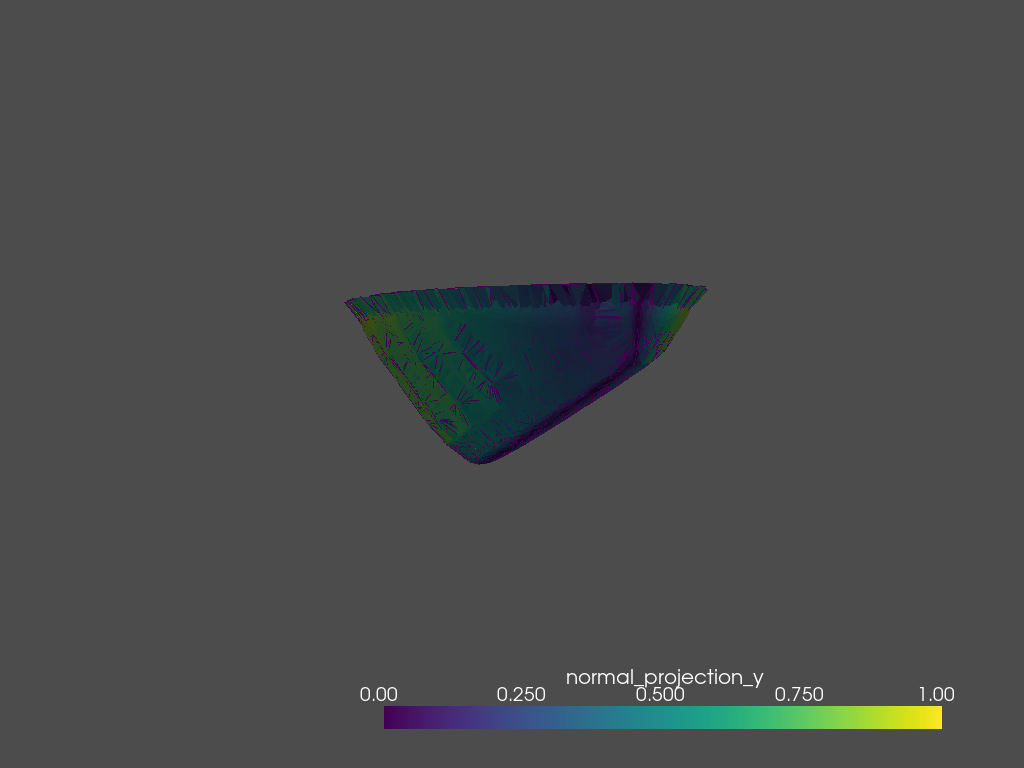

ERROR:root:Attempt to use a texture buffer exceeding your hardware's limits. This can happen when trying to color by cell data with a large dataset. Hardware limit is 65536 values while 222734 was requested.
2023-01-01 07:44:06.081 (72434.556s) [        D6735740]   vtkTextureObject.cxx:1025   ERR| vtkTextureObject (0x3feaed0): Attempt to use a texture buffer exceeding your hardware's limits. This can happen when trying to color by cell data with a large dataset. Hardware limit is 65536 values while 222734 was requested.


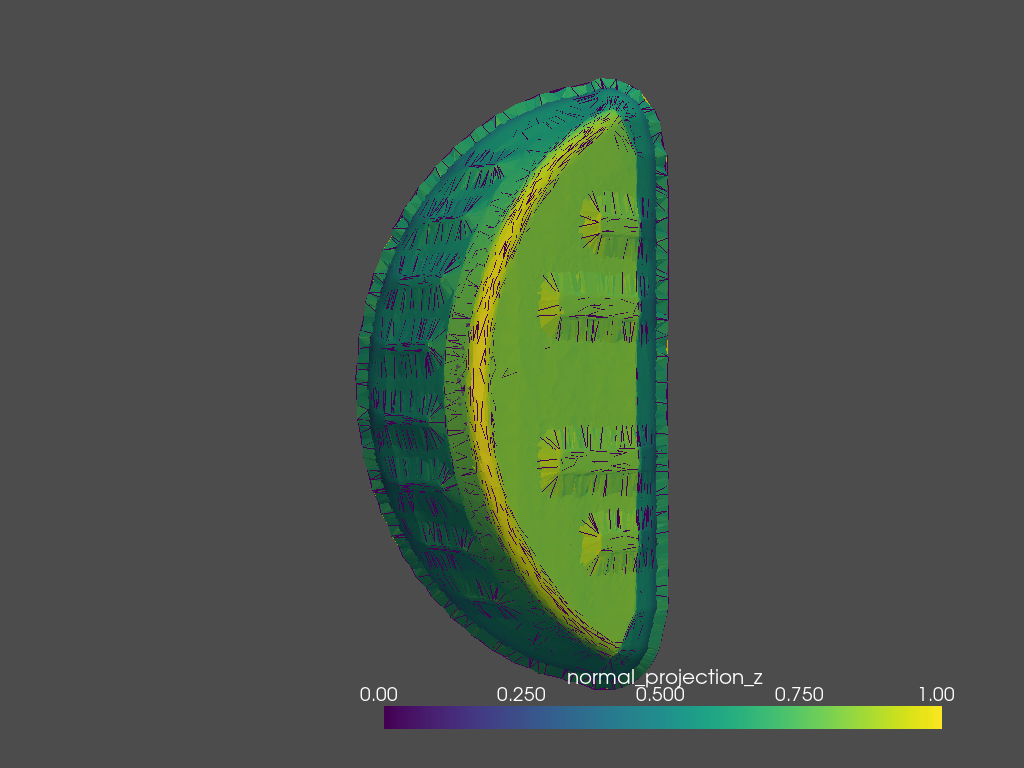

In [38]:
# One potential feature we could pull out is the local gradient of the part, based on building a mesh from the (x, y, z) path
# treated like a point cloud. 

def trace_to_mesh(df, smooth_factor = None, alpha = 16):    
    df_filtered = df[ df['z_enc_1'] <= 0 ]

    points = np.stack([df_filtered['x_enc_1'].to_numpy(), df_filtered['y_enc_1'].to_numpy(), df_filtered['z_enc_1'].to_numpy()]).T

    cloud = pv.PolyData(points)
    volume = cloud.delaunay_3d(alpha=alpha)
    shell = volume.extract_geometry()
    
    if smooth_factor is not None:
        shell = shell.smooth(smooth_factor)
    
    shell['normal_projection_x'] = np.abs(np.dot(shell.face_normals, np.array([[1, 0, 0], [0, 0, 0], [0, 0, 0]]))[:, 0])
    shell['normal_projection_y'] = np.abs(np.dot(shell.face_normals, np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]]))[:, 1])
    shell['normal_projection_z'] = np.abs(np.dot(shell.face_normals, np.array([[0, 0, 0], [0, 0, 0], [0, 0, 1]]))[:, 2])

    return shell

shell = trace_to_mesh(load("Test4.csv"), alpha = 16)

pl = pv.Plotter()
pl.add_mesh(shell, show_edges=False, scalars="normal_projection_x")
pl.camera_position = 'xz'
pl.show()

pl = pv.Plotter()
pl.add_mesh(shell, show_edges=False, scalars="normal_projection_y")
pl.camera_position = 'yz'
pl.show()

pl = pv.Plotter()
pl.add_mesh(shell, show_edges=False, scalars="normal_projection_z")
pl.camera_position = 'yx'
pl.show()